<a href="https://colab.research.google.com/github/Deep-of-Machine/AI_Academy/blob/main/6_2_Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import torch
import torchvision
from torchvision import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True).to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
classes = ["background", "person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "unknown", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "unknown", "backpack",
            "umbrella", "unknown", "unknown", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "unknown", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "unknown", "dining table",
            "unknown", "unknown", "toilet", "unknown", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "unknown",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ] 

(3, 224, 224)의 샘플을 입력했을 때 모델의 출력 형태를 알아봅시다

In [ ]:
sample_image = torch.rand(3,224,224)
output = model(sample_image.view(1,3,224,224).to(device))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
from google.colab import files
files.upload()

Saving image02.jpg to image02.jpg


{'image02.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 82\n\xff\xdb\x00C\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\xff\xdb\x00C\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc0\x00\x11\x08\x055\x07\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\

### 샘플 이미지를 업로드해서, 모델의 예측은 어떠한지 알아봅니다

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls

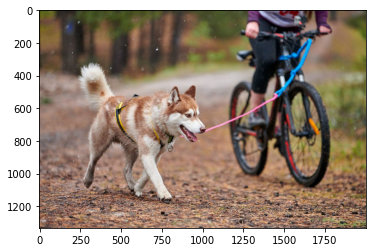

In [ ]:
img = Image.open('./image02.jpg')
plt.imshow(img)
plt.show()

In [ ]:
input = transform(img).to(device)
print(input.shape)

torch.Size([3, 1333, 2000])


In [ ]:
input = input.view(1,3,1333,2000)
#input = input.unsqueeze(0)
print(input.shape)

torch.Size([1, 3, 1333, 2000])


In [ ]:
output = model(input)
output = output[0]

In [ ]:
print(output)

{'boxes': tensor([[2.2455e+02, 3.4751e+02, 9.9602e+02, 1.1540e+03],
        [1.1389e+03, 1.2147e+02, 1.7881e+03, 1.1182e+03],
        [1.2350e+03, 0.0000e+00, 1.6455e+03, 7.1604e+02],
        [1.2460e+03, 5.4973e+00, 1.7861e+03, 3.3320e+02],
        [1.1587e+03, 4.1513e+02, 1.4256e+03, 1.0039e+03],
        [8.5587e+02, 7.0619e+02, 9.6394e+02, 8.0608e+02],
        [1.2049e+03, 1.1972e+02, 1.7917e+03, 6.6398e+02],
        [1.6854e+03, 4.4485e+00, 1.7942e+03, 1.4387e+02],
        [1.4428e+03, 1.2985e+02, 1.7795e+03, 3.6813e+02],
        [1.2670e+03, 1.1835e+02, 1.7598e+03, 4.3471e+02],
        [4.5038e+02, 4.7821e+01, 1.8103e+03, 1.1813e+03],
        [1.5926e+03, 1.6201e+00, 1.7902e+03, 1.4963e+02],
        [1.3545e+03, 0.0000e+00, 1.7746e+03, 1.6275e+02],
        [1.2069e+03, 1.4181e+02, 1.3215e+03, 3.3660e+02],
        [1.2032e+03, 1.3990e+02, 1.3176e+03, 3.3682e+02]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([18,  2,  1,  1,  2, 34,  2,  1,  2,  2,  2,  1,  1,

In [ ]:
output['boxes'].shape, output['labels'].shape, output['scores'].shape

(torch.Size([15, 4]), torch.Size([15]), torch.Size([15]))

In [ ]:
print(output['boxes'][0])

tensor([ 224.5484,  347.5086,  996.0213, 1153.9854], device='cuda:0',
       grad_fn=<SelectBackward>)


스코어가 0.5 이하의 박스를 제거합니다

In [ ]:
idx_list = []
new_dict = {}

for idx, score in enumerate(output['scores']):
    if score > 0.8:
        idx_list.append(idx)

new_dict['boxes'] = output['boxes'][idx_list]
new_dict['labels'] = output['labels'][idx_list]
new_dict['scores'] = output['scores'][idx_list]

print(new_dict)

{'boxes': tensor([[ 224.5484,  347.5086,  996.0213, 1153.9854],
        [1138.8723,  121.4747, 1788.0635, 1118.2488],
        [1234.9879,    0.0000, 1645.4895,  716.0389]], device='cuda:0',
       grad_fn=<IndexBackward>), 'labels': tensor([18,  2,  1], device='cuda:0'), 'scores': tensor([0.9988, 0.9980, 0.9680], device='cuda:0', grad_fn=<IndexBackward>)}


원래 이미지와, 모델의 출력으로 생성하는 박스들을 시각화합니다

In [ ]:
def plot_image_from_output(img, annotation):
    plt.imshow(img)
    ax = plt.gca()

    for idx in range(len(annotation['scores'])):

        xmin, ymin, xmax, ymax = annotation["boxes"][idx]
     
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1, edgecolor = 'r', fill = False)

        ax.add_patch(rect)
    
    plt.show()

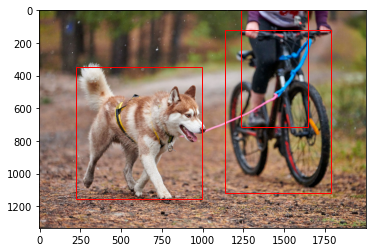

In [ ]:
plot_image_from_output(img, new_dict)

각 박스별로 어떤 클래스라고 예측했는지 알아봅니다

In [ ]:
def plot_image_from_output2(img, annotation):

    for idx in range(len(annotation['scores'])):
        plt.imshow(img)
        ax = plt.gca()

        xmin, ymin, xmax, ymax = annotation["boxes"][idx]
     
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1, edgecolor = 'r', fill = False)  #클래스 별로 분리시켜주는 코드

        ax.add_patch(rect)
        
        print(classes[annotation['labels'][idx].item()])
        plt.show()

dog


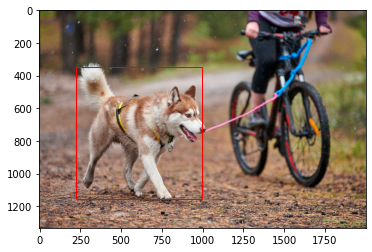

bicycle


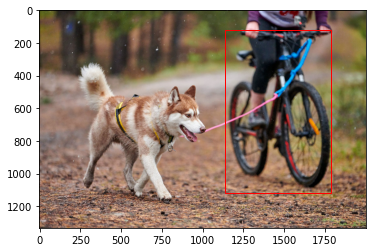

person


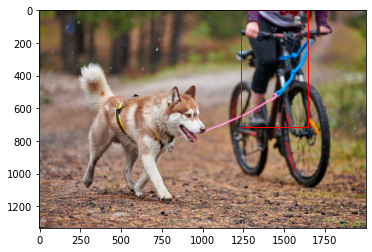

In [ ]:
plot_image_from_output2(img, new_dict)

In [ ]:
# plot_image_from_output2(img, output)

In [ ]:
def plot_image_from_output3(img, annotation):

    for idx in range(len(annotation['scores'])):
        plt.imshow(img)
        ax = plt.gca()

        xmin, ymin, xmax, ymax = annotation["boxes"][idx]
     
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1, edgecolor = ['r', 'g', 'b'][idx], fill = False)  #클래스 별로 분리시켜주는 코드

        ax.add_patch(rect)
    plt.show()

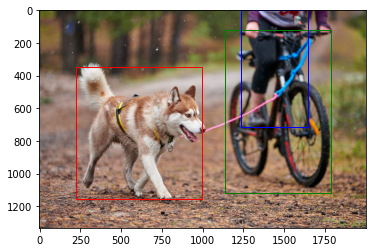

In [ ]:
plot_image_from_output3(img, new_dict)